# import the necessary python libraries and dataset

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('books.csv')
df=df.drop(['Unnamed: 12'], axis=1)
df.head()

bookID                                              title  \
0   34889  Brown's Star Atlas: Showing All The Bright Sta...   
1   22128                     Patriots (The Coming Collapse)   
2   16914                  The Tolkien Fan's Medieval Reader   
3   12224  Streetcar Suburbs: The Process of Growth in Bo...   
4    2034  Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...   

                                    authors  average_rating       isbn  \
0                                     Brown           8.876          0   
1                              James Wesley           8.320       3.63   
2  David E. Smith (Turgon of TheOneRing.net           8.765       3.58   
3                           Sam Bass Warner           8.000       3.58   
4       Aristophanes/F.W. Hall/W.M. Geldart           5.000  198145047   

       isbn13 language_code num_pages  ratings_count  text_reviews_count  \
0   851742718      9.78E+12       eng             49                   0   
1  156384155X      9.78E+12       eng            342                  38   
2  1593600119      9.78E+12       eng            400                  26   
3   674842111      9.78E+12     en-US            236                  61   
4    9.78E+12           grc       364              0                   0   

  publication_date                     publisher  
0                0                    05/01/1977  
1                4                     1/15/1999  
2                4                    04/06/2004  
3                6                     4/20/2004  
4        2/22/1922  Oxford University Press  USA

# data Exploration

In [20]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  object 
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  object 
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.0+ MB


In [22]:
df.describe()

bookID  average_rating  ratings_count  text_reviews_count
count  11127.000000    11127.000000   1.112700e+04        11127.000000
mean   21310.938887        3.935713   1.793649e+04          541.864474
std    13093.358023        0.360972   1.124794e+05         2576.174610
min        1.000000        0.000000   0.000000e+00            0.000000
25%    10287.000000        3.770000   1.040000e+02            9.000000
50%    20287.000000        3.960000   7.450000e+02           47.000000
75%    32104.500000        4.140000   4.993500e+03          237.500000
max    45641.000000        8.876000   4.597666e+06        94265.000000

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\1241995286.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='average_rating', ylabel='title'>

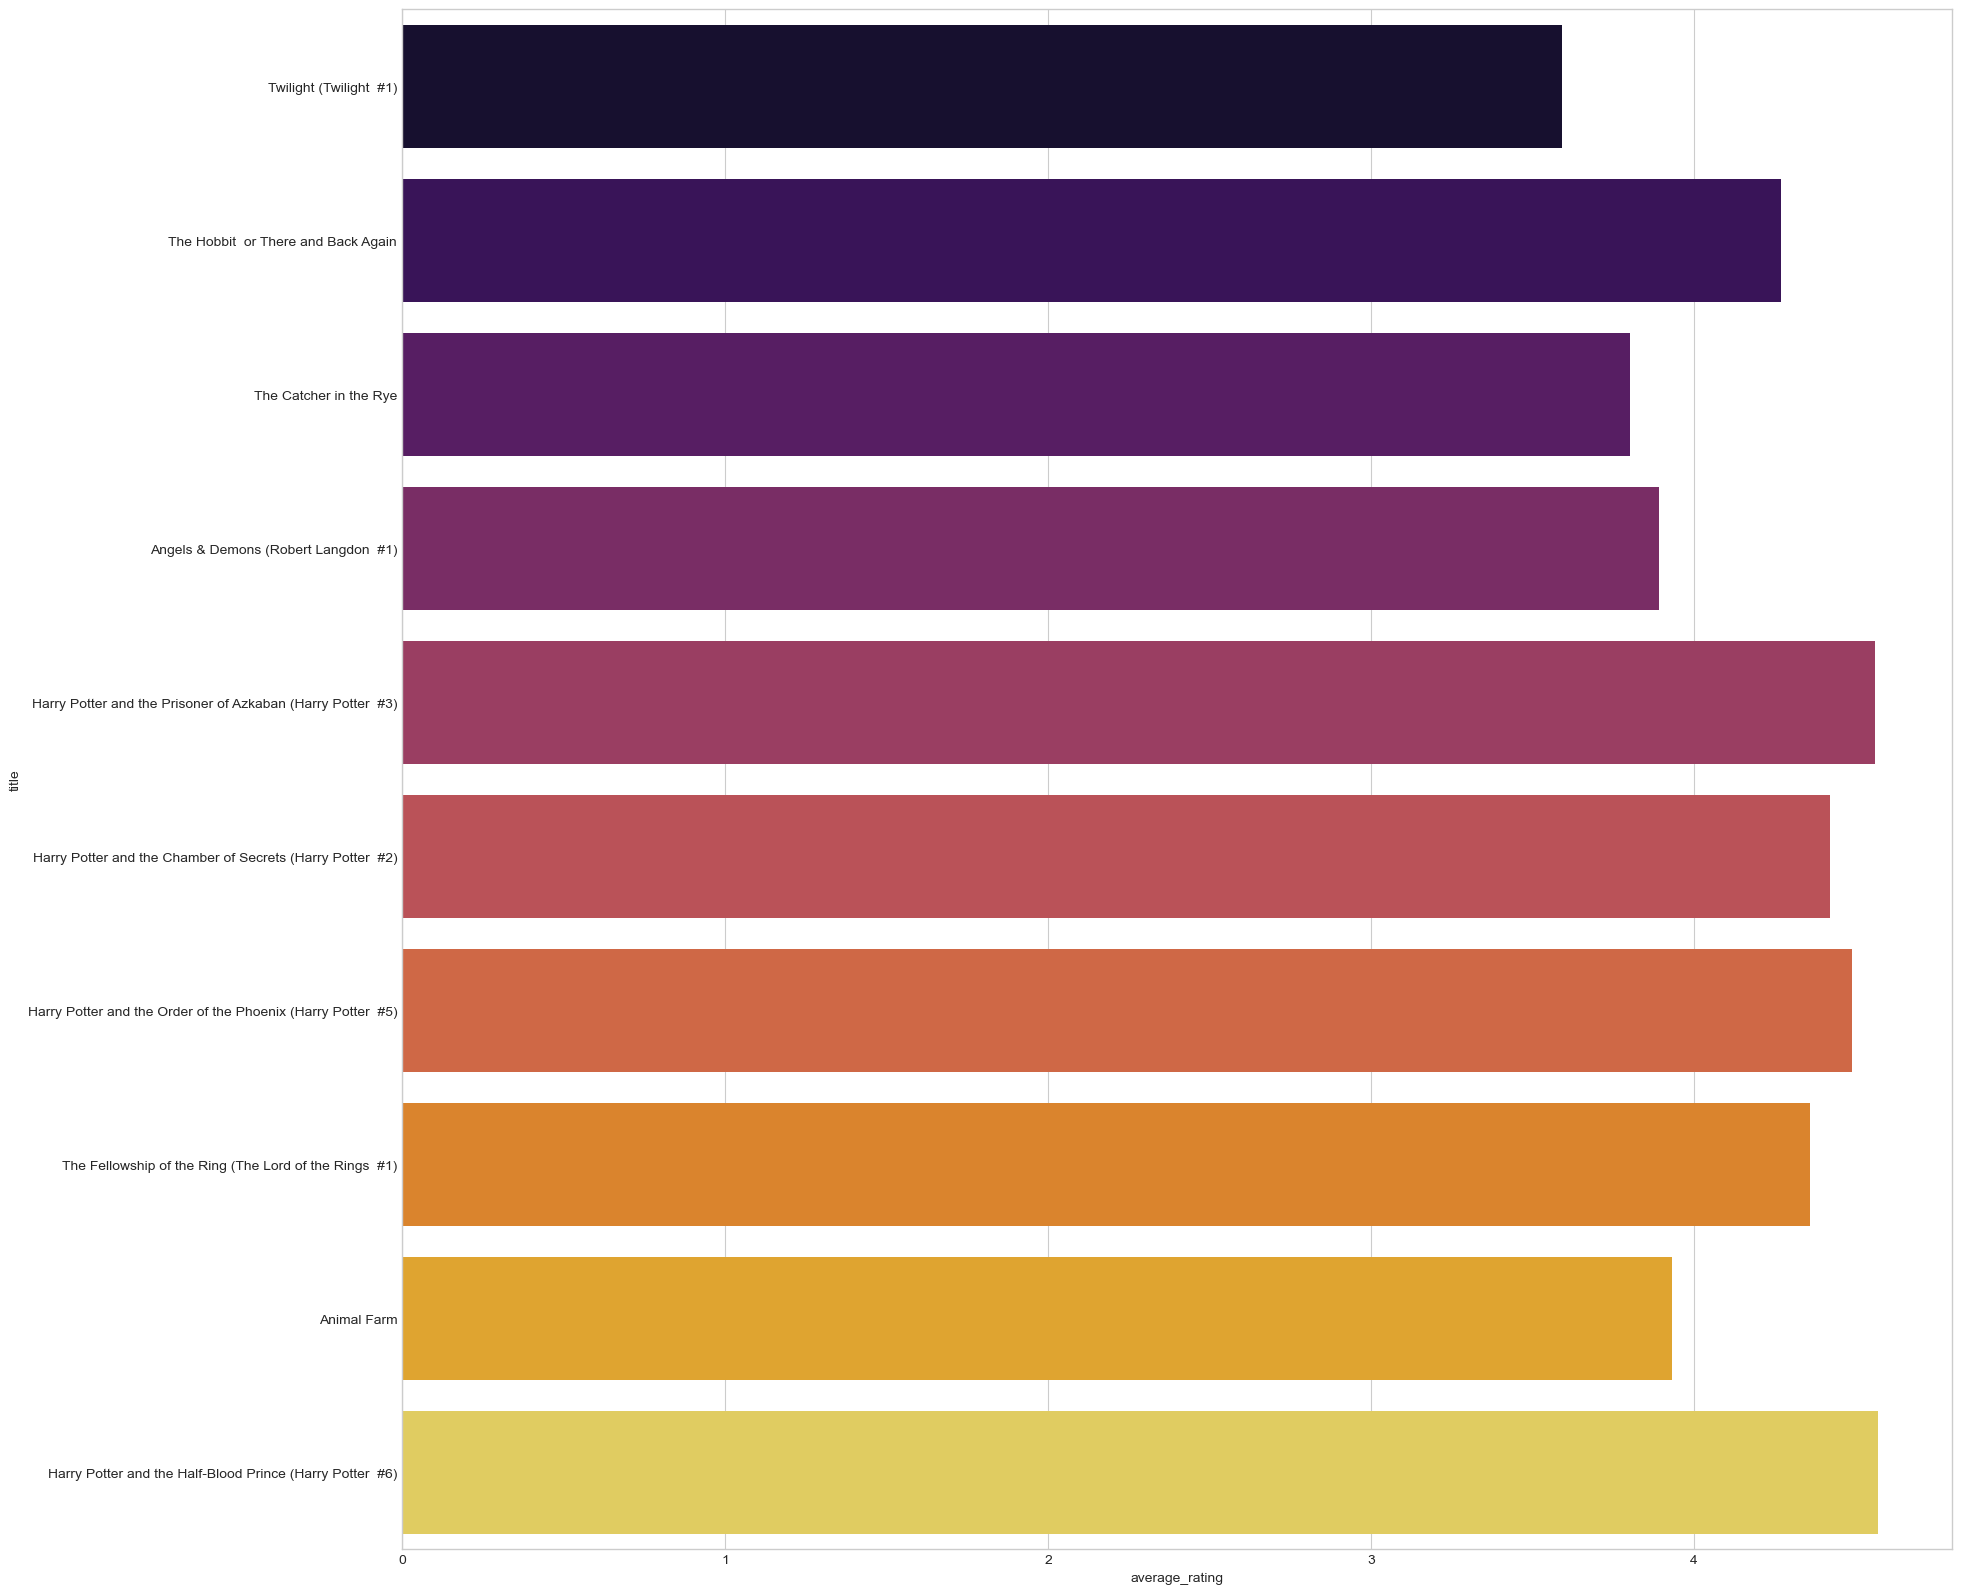

In [27]:
top_ten=df[df['ratings_count']>1000000]

top_ten=top_ten.sort_values(by='ratings_count', ascending=False).head(10)
top_ten_rating=top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,20))
sns.barplot(x="average_rating", y="title",data=top_ten, palette='inferno')

In [29]:
book_aut=df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
book_aut

title
authors                           
P.G. Wodehouse                  40
Stephen King                    40
Rumiko Takahashi                39
Orson Scott Card                35
Agatha Christie                 33
Piers Anthony                   30
Mercedes Lackey                 29
Sandra Brown                    29
Dick Francis                    28
Margaret Weis/Tracy Hickman     23

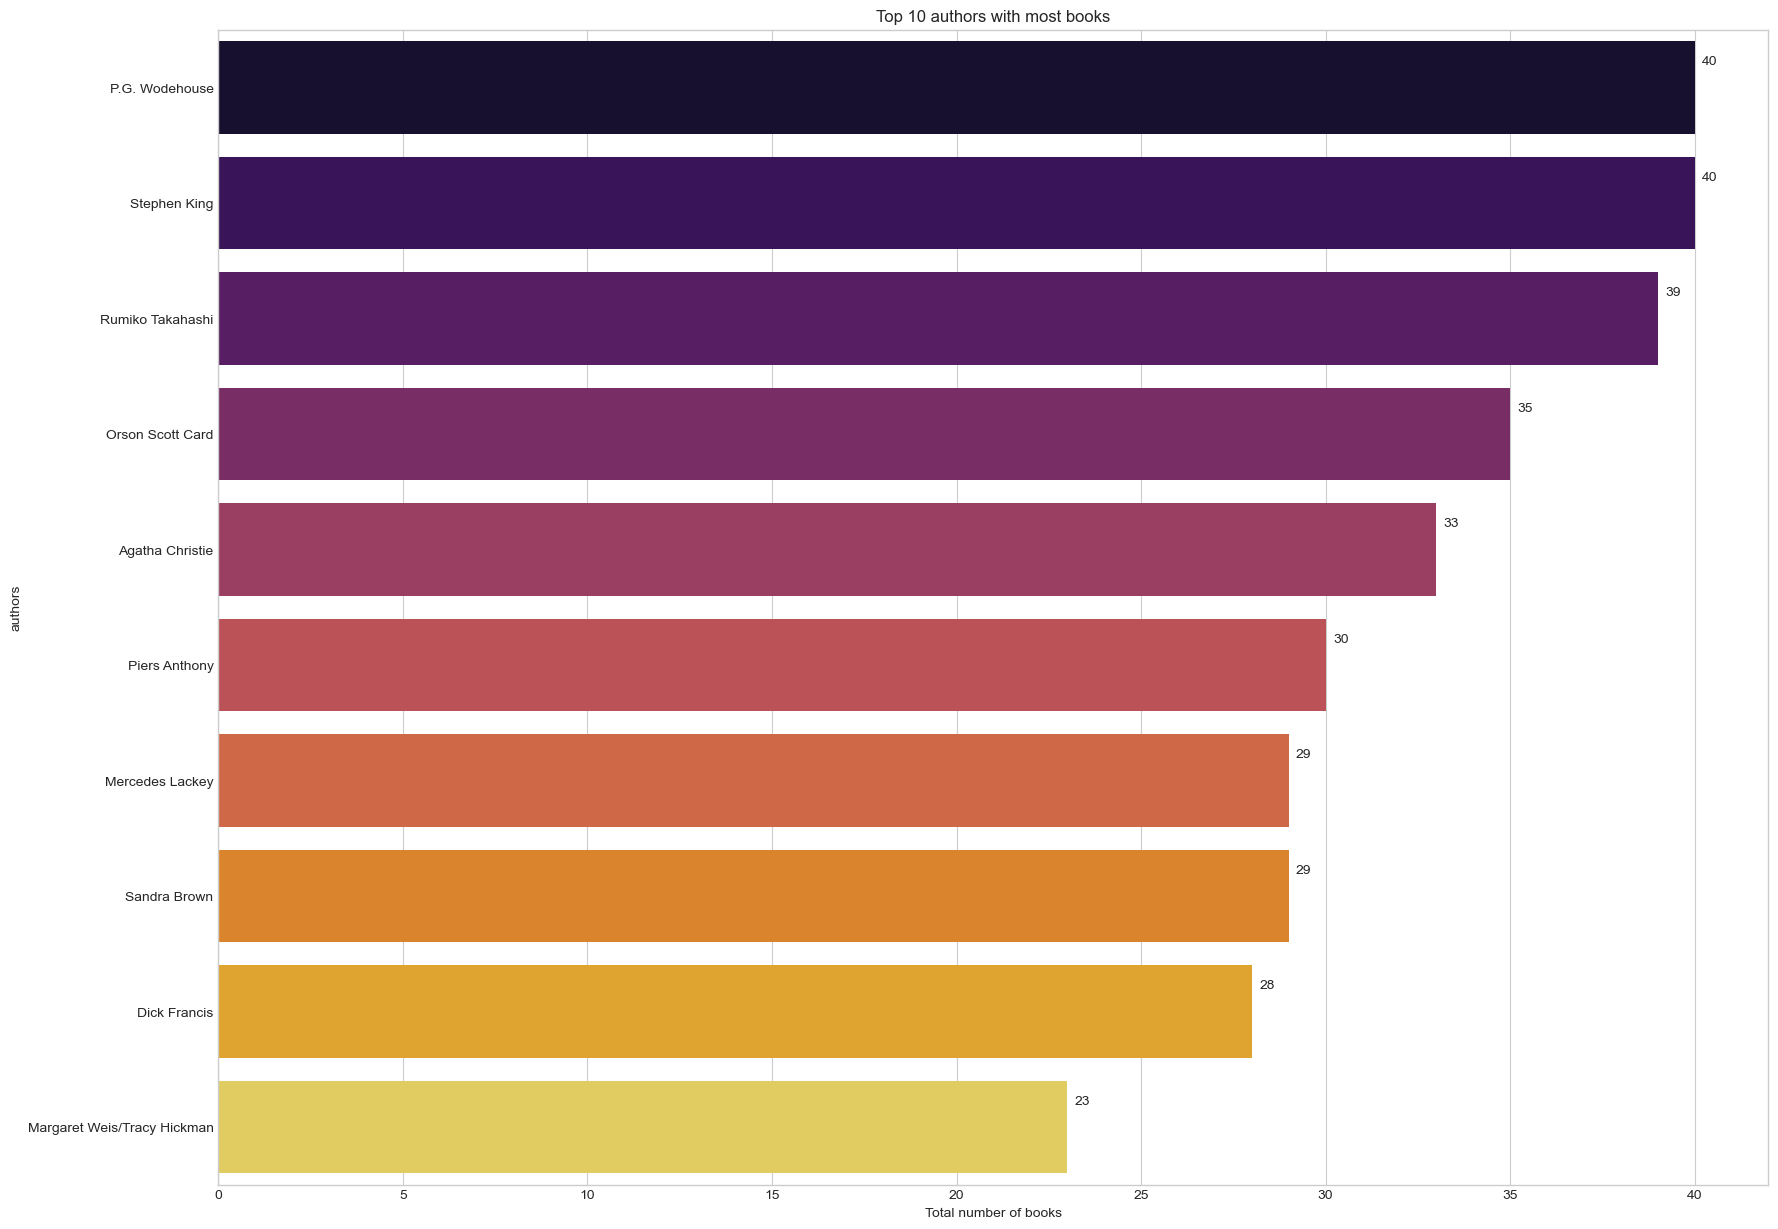

In [32]:
plt.figure(figsize=(20, 15))
ax = sns.barplot(x='title', y=book_aut.index, data=book_aut, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

total = []

for i in ax.patches:
    total.append(i.get_width())

totals = sum(total)

for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())))

plt.show()


In [38]:
most_rated=df.sort_values('ratings_count', ascending=False).head(10).set_index('title')
most_rated

bookID  \
title                                                        
Twilight (Twilight  #1)                              41865   
The Hobbit  or There and Back Again                   5907   
The Catcher in the Rye                                5107   
Angels & Demons (Robert Langdon  #1)                   960   
Harry Potter and the Prisoner of Azkaban (Harry...       5   
Harry Potter and the Chamber of Secrets (Harry ...   15881   
Harry Potter and the Order of the Phoenix (Harr...       2   
The Fellowship of the Ring (The Lord of the Rin...      34   
Animal Farm                                           7613   
Harry Potter and the Half-Blood Prince (Harry P...       1   

                                                                                    authors  \
title                                                                                         
Twilight (Twilight  #1)                                                     Stephenie Meyer   
The Hobbit  or There and Back Again                                          J.R.R. Tolkien   
The Catcher in the Rye                                                        J.D. Salinger   
Angels & Demons (Robert Langdon  #1)                                              Dan Brown   
Harry Potter and the Prisoner of Azkaban (Harry...               J.K. Rowling/Mary GrandPré   
Harry Potter and the Chamber of Secrets (Harry ...               J.K. Rowling/Mary GrandPré   
Harry Potter and the Order of the Phoenix (Harr...               J.K. Rowling/Mary GrandPré   
The Fellowship of the Ring (The Lord of the Rin...                           J.R.R. Tolkien   
Animal Farm                                         George Orwell/Boris Grabnar/Peter Škerl   
Harry Potter and the Half-Blood Prince (Harry P...               J.K. Rowling/Mary GrandPré   

                                                    average_rating  \
title                                                                
Twilight (Twilight  #1)                                       3.59   
The Hobbit  or There and Back Again                           4.27   
The Catcher in the Rye                                        3.80   
Angels & Demons (Robert Langdon  #1)                          3.89   
Harry Potter and the Prisoner of Azkaban (Harry...            4.56   
Harry Potter and the Chamber of Secrets (Harry ...            4.42   
Harry Potter and the Order of the Phoenix (Harr...            4.49   
The Fellowship of the Ring (The Lord of the Rin...            4.36   
Animal Farm                                                   3.93   
Harry Potter and the Half-Blood Prince (Harry P...            4.57   

                                                          isbn    isbn13  \
title                                                                      
Twilight (Twilight  #1)                              316015849  9.78E+12   
The Hobbit  or There and Back Again                  618260307  9.78E+12   
The Catcher in the Rye                               316769177  9.78E+12   
Angels & Demons (Robert Langdon  #1)                1416524797  9.78E+12   
Harry Potter and the Prisoner of Azkaban (Harry...  043965548X  9.78E+12   
Harry Potter and the Chamber of Secrets (Harry ...   439064864  9.78E+12   
Harry Potter and the Order of the Phoenix (Harr...   439358078  9.78E+12   
The Fellowship of the Ring (The Lord of the Rin...   618346252  9.78E+12   
Animal Farm                                          452284244  9.78E+12   
Harry Potter and the Half-Blood Prince (Harry P...   439785960  9.78E+12   

                                                   language_code num_pages  \
title                                                                        
Twilight (Twilight  #1)                                      eng       501   
The Hobbit  or There and Back Again                          eng       366   
The Catcher in the Rye                                       eng       277   
Angels & Demons (Rober

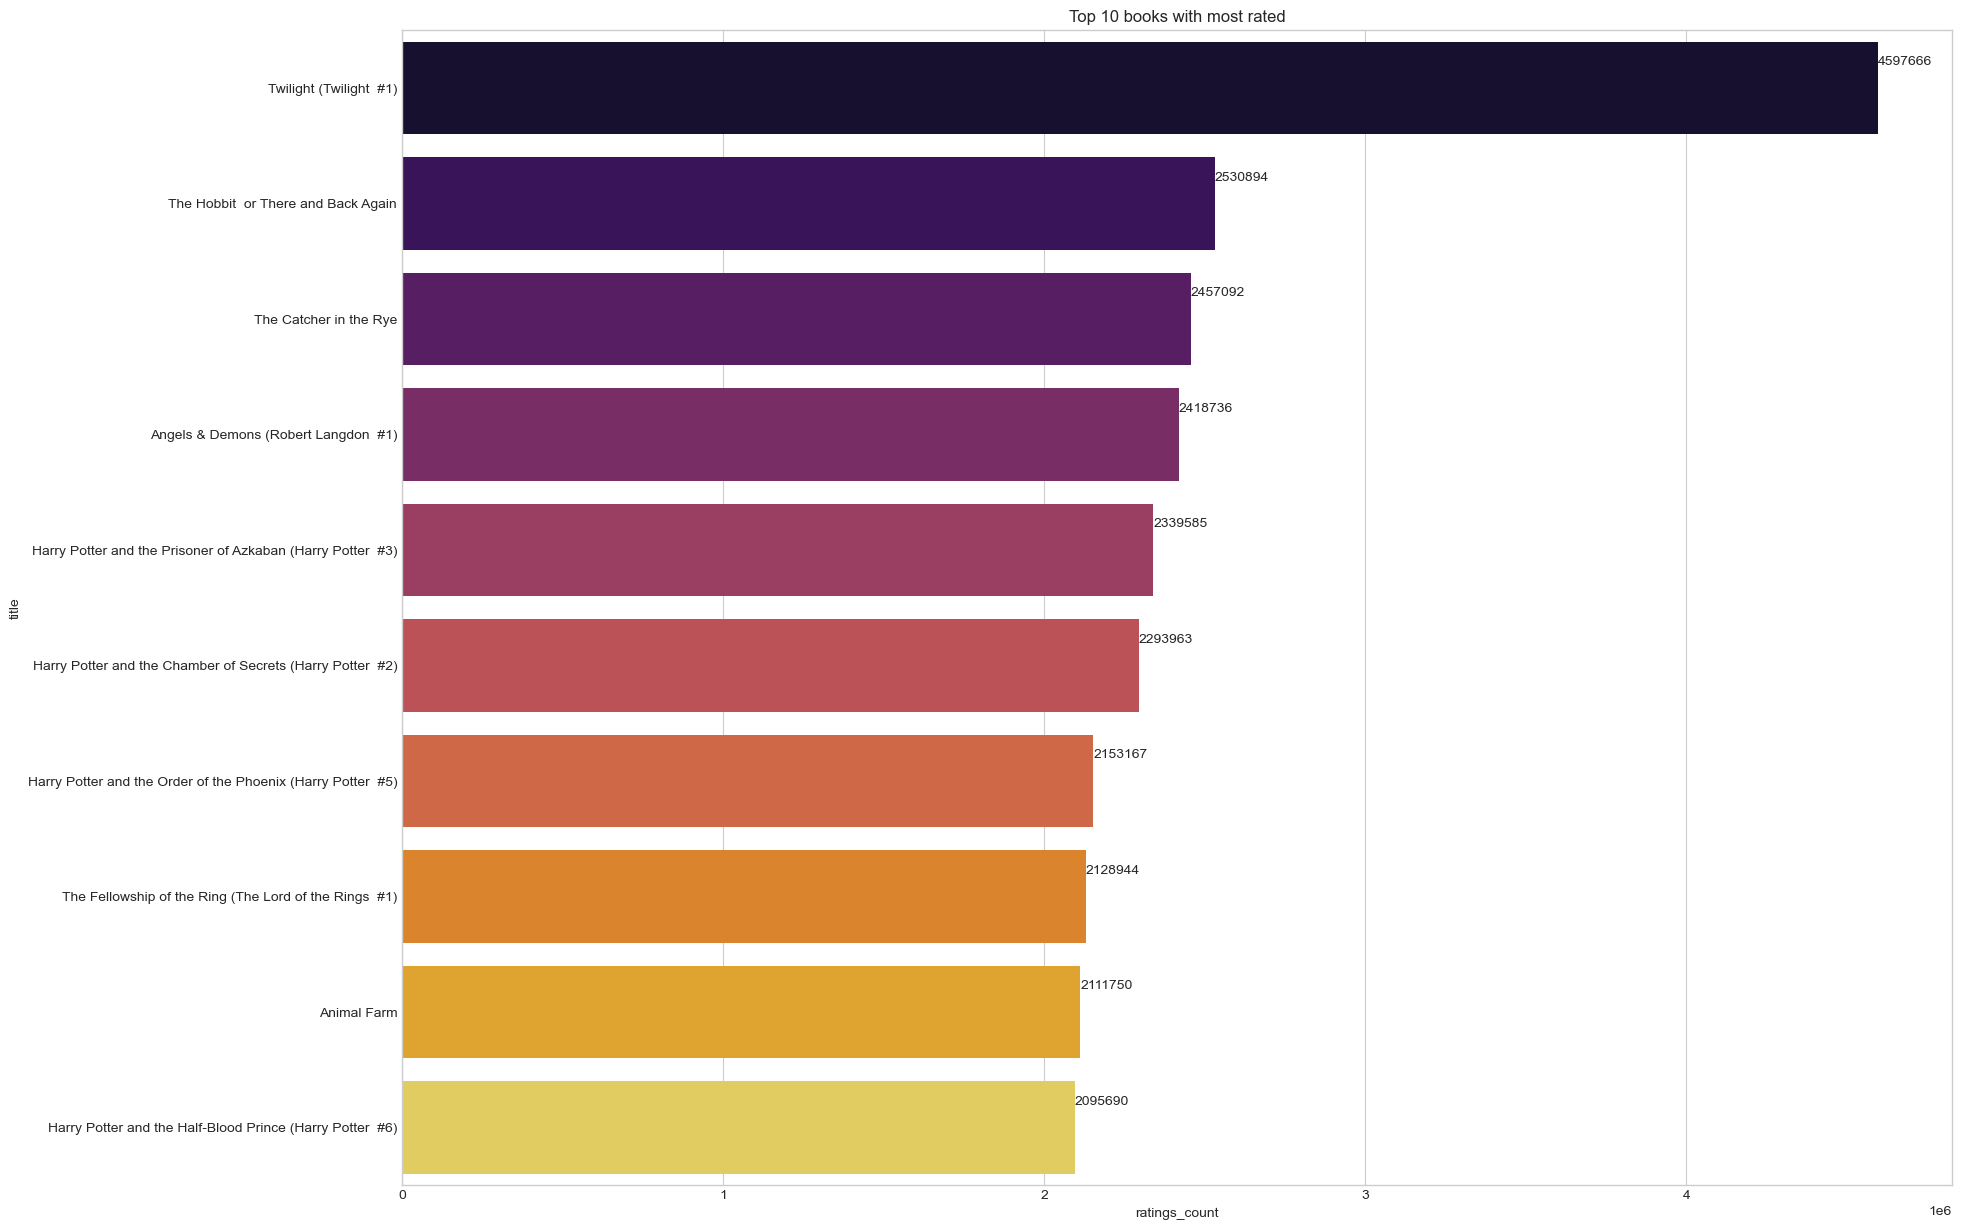

In [40]:
plt.figure(figsize=(20, 15))

# Corrected sns.barplot by specifying 'x', 'y', and 'data'
ax = sns.barplot(x='ratings_count', y=most_rated.index, data=most_rated, palette='inferno')
ax.set_title("Top 10 books with most rated")

total = []

for i in ax.patches:
    total.append(i.get_width())

totals = sum(total)

for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())))

plt.show()


In [41]:
df=df.sort_values('average_rating').reset_index()
df=df.iloc[4:]
df

index  bookID                                              title  \
4      11105    9337  How To Meditate: An Anthology Of Talks On Medi...   
5      11106    9338         Insights: Talks On The Nature Of Existence   
6      11107   10200                Venac sonetnih venaca; Puževa srma   
7      11108   12712  Brodie's notes on Aldous Huxley's brave new world   
8      11109   15186                                American Film Guide   
...      ...     ...                                                ...   
11122     14   20954                                Winchester Shotguns   
11123      3   12224  Streetcar Suburbs: The Process of Growth in Bo...   
11124      1   22128                     Patriots (The Coming Collapse)   
11125      2   16914                  The Tolkien Fan's Medieval Reader   
11126      0   34889  Brown's Star Atlas: Showing All The Bright Sta...   

                                        authors  average_rating        isbn  \
4                             Frederick P. Lenz           0.000  1932206108   
5                             Frederick P. Lenz           0.000  1932206086   
6                                  Dobrica Erić           0.000  8644101277   
7                                Graham Handley           0.000   333581296   
8                               Frank N. Magill           0.000   893562505   
...                                         ...             ...         ...   
11122                  Dennis Adler/R.L. Wilson           5.000   785821082   
11123                           Sam Bass Warner           8.000        3.58   
11124                              James Wesley           8.320        3.63   
11125  David E. Smith (Turgon of TheOneRing.net           8.765        3.58   
11126                                     Brown           8.876           0   

           isbn13 language_code num_pages  ratings_count  text_reviews_count  \
4        9.78E+12           eng       228              0                   0   
5        9.78E+12           eng       304              0                   0   
6        9.79E+12           srp       222              0                   0   
7        9.78E+12           eng        71              0                   0   
8        9.78E+12           eng         5              0                   0   
...           ...           ...       ...            ...                 ...   
11122    9.78E+12           eng       372              2                   0   
11123   674842111      9.78E+12     en-US            236                  61   
11124  156384155X      9.78E+12       eng            342                  38   
11125  1593600119      9.78E+12       eng            400                  26   
11126   851742718      9.78E+12       eng             49                   0   

      publication_date                                          publisher  
4           01/01/2004  Frederick P. Lenz Foundation for American Budd...  
5           01/01/2003  Frederick P. Lenz Foundation for American Budd...  
6           01/01/1996                     Izdavačka agencija "Draganić"  
7            8/20/1992                                          Macmillan  
8           01/01/1983                                    Salem Press Inc  
...                ...                                                ...  
11122        5/15/2008                                    Chartwell Books  
11123                6                                          4/20/2004  
11124                4                                          1/15/1999  
11125                4                                         04/06/2004  
11126                0                                         05/01/1977  

[11123 rows x 13 columns]

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\1936968456.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'], ax=ax)


Text(0.5, 0, 'average rating')

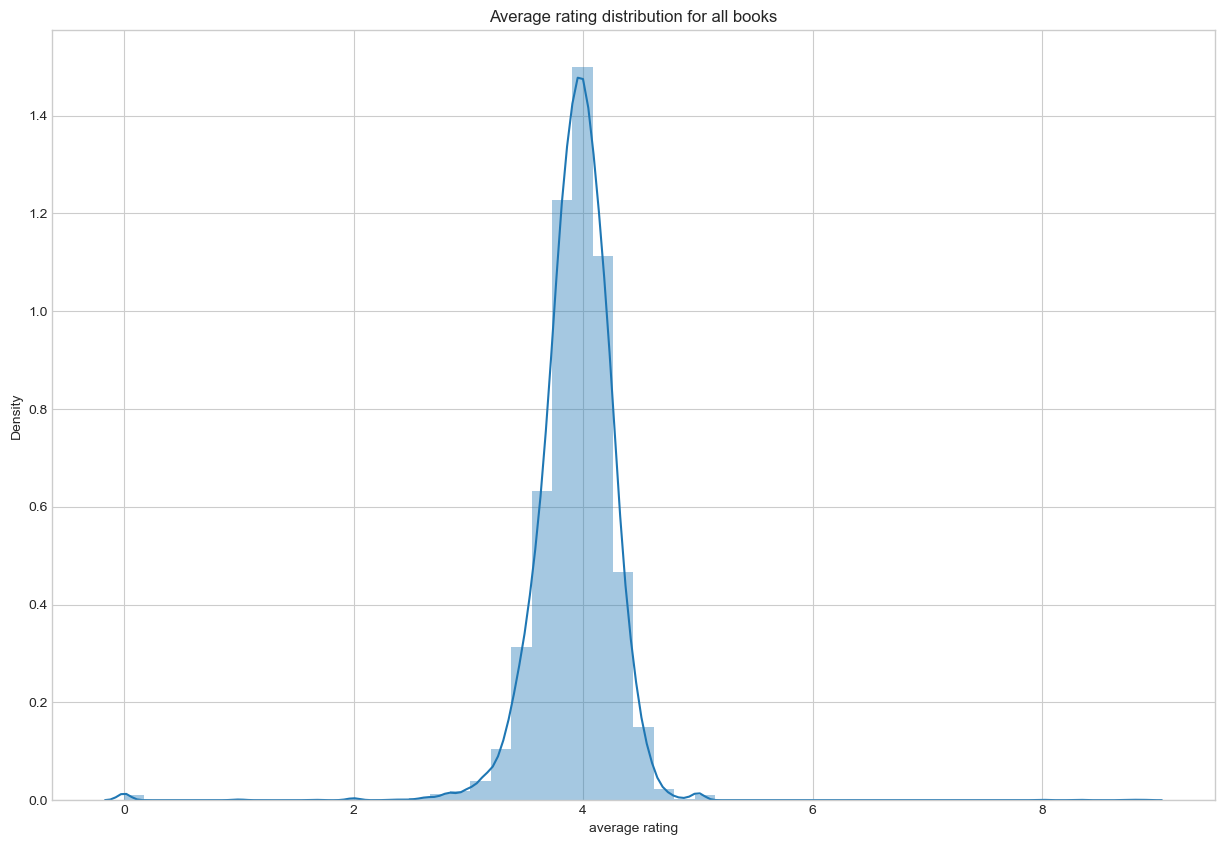

In [42]:
df.average_rating=df.average_rating.astype(float)
fig, ax= plt.subplots(figsize=[15,10])

sns.distplot(df['average_rating'], ax=ax)
ax.set_title('Average rating distribution for all books')
ax.set_xlabel('average rating')

In [13]:
df.tail(50)

bookID                                              title  \
11077   31880  Introduction to the Philosophies of Research a...   
11078   41258            Raised on Rock: Growing Up at Graceland   
11079   18722                                      Alentejo Blue   
11080    1856                        In Web Design for Libraries   
11081    2019                          The Birds (Methuen Drama)   
11082   24598  Juneau and Sauk Counties: 1850-2000 (Images of...   
11083   40706  Mind Over Money: How to Match Your Emotional S...   
11084   36402       The Governess; or  The Little Female Academy   
11085    8880             Planet of the Apes  Volume 1: Old Gods   
11086   26197  Healthy Cooking for IBS: 100 Delicious Recipes...   
11087   34706                                   13th Directorate   
11088   34835                                  A Matter of Trust   
11089   16021  The Trouble with the Pears: An Intimate Portra...   
11090   24530              Field Guide to Home Buying in America   
11091   33993                                       Citizen Girl   
11092   45516             The Die Broke Financial Problem Solver   
11093    5863                                       V.S. Naipaul   
11094   13964  The Boys of the Archangel Raphael: A Youth Con...   
11095   20157  McDougal Littell Science: Student Edition Grad...   
11096   21107  The Halloween Activity Book: Creepy  Crawly  H...   
11097   25780               The Two Tocquevilles  Father and Son   
11098   31166  The Earth and Its Peoples: A Global History  V...   
11099   30651  The Art of Loving by Erich Fromm: A True Story...   
11100   11854           Puzzle Pack: The Witch of Blackbird Pond   
11101   37877                               Mandala Sand Art Kit   
11102     799  Out to Eat London 2002 (Lonely Planet Out to Eat)   
11103    1302                     Juiced Official Strategy Guide   
11104    3351           Open City 6: The Only Woman He Ever Left   
11105    9337  How To Meditate: An Anthology Of Talks On Medi...   
11106    9338         Insights: Talks On The Nature Of Existence   
11107   10200                Venac sonetnih venaca; Puževa srma   
11108   12712  Brodie's notes on Aldous Huxley's brave new world   
11109   15186                                American Film Guide   
11110   16806  The Man and the Author: John Milton: Twentieth...   
11111   19257  Canopy: A Work for Voice and Light in Harvard ...   
11112   24010         Laguna  I Love You: The Best of "Our Town"   
11113   24749                  American Writers  Supplement VIII   
11114   25841                           The Road To War  1933 39   
11115   25903  I'll Be Home Before Midnight and I Won't Get P...   
11116   27416  Mythographi Graeci 1: Apollodori Bibliotheca  ...   
11117   28467                   Sclerotherapy and vein treatment   
11118   29091                           The Berlin Phenomenology   
11119   29404       Your Child and Jesus: A Family Activity Book   
11120   30080                  Beckett Football Card Price Guide   
11121   36946      Random House Crossword Mega Omnibus  Volume 1   
11122   37467  Classroom Interactions as Cross-Cultural Encou...   
11123   41044                                      Day and Night   
11124   42758  The Fantastic Vampire: Studies in the Children...   
11125   44705  The Leadership Challenge: Skills for Taking Ch...   
11126   45259  Anthony Thwaite: In Conversation With Peter Da...   

                                                 authors  average_rating  \
11077                                       James   Paul            2.75   
11078                            David Stanley/Mark Bego            2.75   
11079                                         Monica Ali            2.72   
11080                              Charles P. Rubenstein            2.67   
11081                                       Sean O'Brien            2.67   
11082                           Jacqueline Ann/Sheila Z.            2.67   
11083 

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

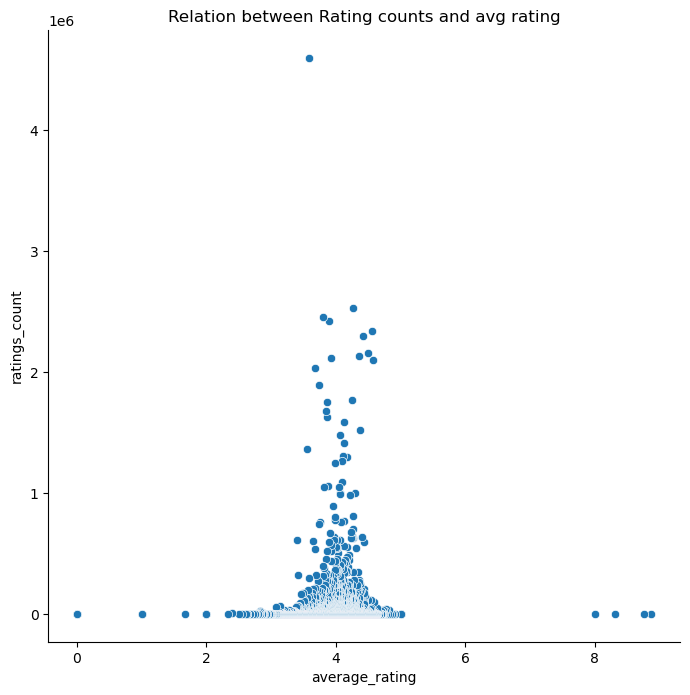

In [14]:
plt.figure(figsize=(20,20))
ax=sns.relplot(data=df, x="average_rating", y="ratings_count",sizes=(400,200), height=7)
plt.title('Relation between Rating counts and avg rating')
ax.set_axis_labels("average_rating", "ratings_count")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  object 
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  object 
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.0+ MB


In [16]:
df=df.sort_values('num_pages', ascending=False).reset_index()
df=df.iloc[4:]
df.head(20)

index  bookID                                              title  \
4    6490   11511                                 L'Échiquier du mal   
5   10466   27847         Data Structures and Abstractions with Java   
6    5073   28898  Fundamentals of Heat and Mass Transfer [with I...   
7    4499   16619                               Democracy in America   
8    7256   11525                 1 000 Places to See Before You Die   
9     837   28389                              Marcel Proust: A Life   
10    438   19809  The Last Lion: Winston Spencer Churchill: Visi...   
11    437   19808  The Last Lion: Winston Spencer Churchill: Visi...   
12   4039   19670                      Debt of Honor (Jack Ryan  #7)   
13   9425   24978                                         Inside Job   
14   1028   31580                                In Search of Duende   
15    632   44921                                 Explode the Code 1   
16  10253   34307                                      Aches & Pains   
17   5813    7015                          A Midsummer Night's Dream   
18   2629   35539                         The Beatles: The Biography   
19   2372   31871                    History of Political Philosophy   
20   4951   43236                                     MySQL Cookbook   
21   6512   14812        The Sword of Angels (The Bronze Knight  #3)   
22    344   10965         A Breath of Snow and Ashes (Outlander  #6)   
23   4879   30041                 Elric of Melnibone: Bright Shadows   

                                              authors  average_rating  \
4                                         Dan Simmons            3.90   
5                  Frank M. Carrano/Walter J. Savitch            3.47   
6                  Frank P. Incropera/David P. DeWitt            3.99   
7   Alexis de Tocqueville/Isaac Kramnick/Gerald Bevan            4.02   
8                                    Patricia Schultz            3.85   
9                                   William C. Carter            4.33   
10                                 William Manchester            4.42   
11                                 William Manchester            4.42   
12                                         Tom Clancy            4.05   
13                                      Connie Willis            3.67   
14    Federico García Lorca/Norman Thomas di Giovanni            4.30   
15                                         Nancy Hall            4.37   
16                            Maeve Binchy/Wendy Shea            3.53   
17                      William Shakespeare/Roma Gill            3.94   
18                                          Bob Spitz            4.15   
19                         Leo Strauss/Joseph Cropsey            4.17   
20                                        Paul DuBois            4.00   
21                                         John Marco            3.90   
22                                     Diana Gabaldon            4.44   
23        Charles  Green/Richard Ford/Pascal Quidault            4.00   

          isbn    isbn13 language_code num_pages  ratings_count  \
4   2207254410  9.78E+12           fre       999             63   
5   013237045X  9.78E+12           eng       998             34   
6    470055545  9.78E+12         en-US       997              6   
7    140447601  9.78E+12           eng       992          18925   
8    761104844  9.78E+12           eng       992          36303   
9    300094000  9.78E+12           eng       992             14   
10   385313489  9.78E+12           eng       992           9659   
11   316545031  9.78E+12         en-US       992            335   
12   425147584  9.78E+12           eng       990          39521   
13  1596060247  9.78E+12           eng        99           1442   
14   811213765  9.78E+12           eng        99            616   
15   838814603  9.78E+12           eng        99             89   
16   385335105  9.78E+12         en-US        99            356   
17   198320213  9.7

In [17]:
df.num_pages=df.num_pages.astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 4 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               11123 non-null  int64  
 1   bookID              11123 non-null  int64  
 2   title               11123 non-null  object 
 3   authors             11123 non-null  object 
 4   average_rating      11123 non-null  float64
 5   isbn                11123 non-null  object 
 6   isbn13              11123 non-null  object 
 7   language_code       11123 non-null  object 
 8   num_pages           11123 non-null  float64
 9   ratings_count       11123 non-null  int64  
 10  text_reviews_count  11123 non-null  int64  
 11  publication_date    11123 non-null  object 
 12  publisher           11123 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB


D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

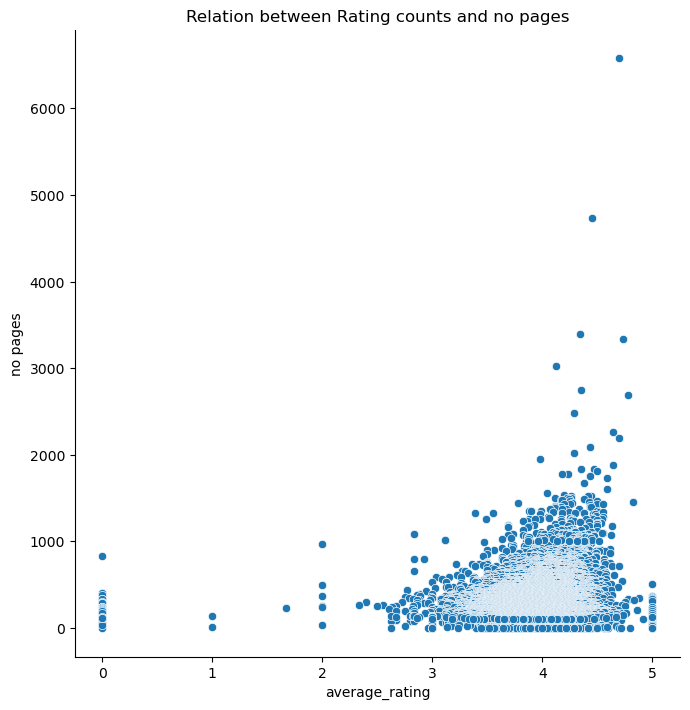

In [19]:
plt.figure(figsize=(20,20))
ax=sns.relplot( x="average_rating", y="num_pages",data=df,sizes=(400,200), height=7)
plt.title('Relation between Rating counts and no pages')
ax.set_axis_labels("average_rating", "no pages")

In [20]:
df2=df.copy()

In [21]:
df2.loc[(df2['average_rating']>=0)&(df2['average_rating']<=1),'rating between']="between 0 and 1"
df2.loc[(df2['average_rating']>1)&(df2['average_rating']<=2),'rating between']="between 1 and 2"
df2.loc[(df2['average_rating']>2)&(df2['average_rating']<=3),'rating between']="between 2 and 3"
df2.loc[(df2['average_rating']>3)&(df2['average_rating']<=4),'rating between']="between 3 and 4"
df2.loc[(df2['average_rating']>4)&(df2['average_rating']<=5),'rating between']="between 4 and 5"

In [22]:
df2.sort_values('average_rating')

index  bookID                                              title  \
8029   11105    9337  How To Meditate: An Anthology Of Talks On Medi...   
10480  11114   25841                           The Road To War  1933 39   
9625   11124   42758  The Fantastic Vampire: Studies in the Children...   
5128   11116   27416  Mythographi Graeci 1: Apollodori Bibliotheca  ...   
8528   11118   29091                           The Berlin Phenomenology   
...      ...     ...                                                ...   
10502      8   14741  Zone of the Enders: The 2nd Runner Official St...   
1600      17   23552                        The New Big Book of America   
8809      10   17830  Bulgakov's the Master and Margarita: The Text ...   
8882      13   19788  The Goon Show  Volume 11: He's Fallen in the W...   
5089      19   32823       Fanning the Flame: Bible  Cross  and Mission   

                                                authors  average_rating  \
8029                                  Frederick P. Lenz             0.0   
10480                                  Andrew      Hunt             0.0   
9625                                  James Craig Holte             0.0   
5128                         Apollodorus/Richard Wagner             0.0   
8528   Georg Wilhelm Friedrich Hegel/Michael John Petry             0.0   
...                                                 ...             ...   
10502                                        Tim Bogenn             5.0   
1600                               Todd Davis/Marc Frey             5.0   
8809                                    Elena N. Mahlow             5.0   
8882                                         NOT A BOOK             5.0   
5089   Chris    Green/Chris Wright/Paul Douglas Gardner             5.0   

             isbn    isbn13 language_code  num_pages  ratings_count  \
8029   1932206108  9.78E+12           eng      228.0              0   
10480   340774770  9.78E+12           eng      128.0              0   
9625    313309337  9.78E+12           eng      176.0              0   
5128   3598715439  9.78E+12           grc      335.0              0   
8528   9027712050  9.79E+12           eng      210.0              0   
...           ...       ...           ...        ...            ...   
10502   744002354  9.78E+12           eng      128.0              2   
1600    762412631  9.78E+12           eng       56.0              2   
8809    533017424  9.78E+12           eng      202.0              4   
8882    563388323  9.78E+12           eng        2.0              2   
5089    310249872  9.78E+12           eng      336.0              1   

       text_reviews_count publication_date  \
8029                    0       01/01/2004   
10480                   0       04/01/2000   
9625                    0        3/30/2002   
5128                    0        7/15/1998   
8528                    0        5/31/1981   
...                   ...              ...   
10502                   0       03/06/2003   
1600                    1        3/21/2002   
8809                    0       01/01/1975   
8882                    0       10/02/1995   
5089                    1        6/17/2003   

                                               publisher   rating between  
8029   Frederick P. Lenz Foundation for American Budd...  between 0 and 1  
10480            Hodder & Stoughton Educational Division  between 0 and 1  
9625                                     Greenwood Press  between 0 and 1  
5128                                    K.G. Saur Verlag  between 0 and 1  
8528                                            Springer  between 0 and 1  
...                                                  ...              ...  
10502                                         BradyGames  between 4 and 5  
1600                                       Courage Books  between 4 and 5  
8809                                       Vantage Press  between 4 and 5  
8882                                  B

In [23]:
rating_df=pd.get_dummies(df2['rating between'])
language_df=pd.get_dummies(df2['language_code'])

In [24]:
language_df

ale    ara  en-CA  en-GB  en-US    eng    enm    fre    ger    gla  \
4      False  False  False  False  False  False  False   True  False  False   
5      False  False  False  False  False   True  False  False  False  False   
6      False  False  False  False   True  False  False  False  False  False   
7      False  False  False  False  False   True  False  False  False  False   
8      False  False  False  False  False   True  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
11122  False  False  False  False  False   True  False  False  False  False   
11123  False  False  False  False  False   True  False  False  False  False   
11124  False  False  False  False  False   True  False  False  False  False   
11125  False  False  False  False  False   True  False  False  False  False   
11126  False  False  False  False  False   True  False  False  False  False   

       ...     nl    nor    por    rus    spa    srp    swe    tur    wel  \
4      ...  False  False  False  False  False  False  False  False  False   
5      ...  False  False  False  False  False  False  False  False  False   
6      ...  False  False  False  False  False  False  False  False  False   
7      ...  False  False  False  False  False  False  False  False  False   
8      ...  False  False  False  False  False  False  False  False  False   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
11122  ...  False  False  False  False  False  False  False  False  False   
11123  ...  False  False  False  False  False  False  False  False  False   
11124  ...  False  False  False  False  False  False  False  False  False   
11125  ...  False  False  False  False  False  False  False  False  False   
11126  ...  False  False  False  False  False  False  False  False  False   

         zho  
4      False  
5      False  
6      False  
7      False  
8      False  
...      ...  
11122  False  
11123  False  
11124  False  
11125  False  
11126  False  

[11123 rows x 27 columns]

In [25]:
feature=pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)

In [26]:
feature 

between 0 and 1  between 1 and 2  between 2 and 3  between 3 and 4  \
4                False            False            False             True   
5                False            False            False             True   
6                False            False            False             True   
7                False            False            False            False   
8                False            False            False             True   
...                ...              ...              ...              ...   
11122            False            False            False             True   
11123            False            False            False             True   
11124            False            False            False             True   
11125            False            False            False             True   
11126            False            False            False            False   

       between 4 and 5    ale    ara  en-CA  en-GB  en-US  ...    por    rus  \
4                False  False  False  False  False  False  ...  False  False   
5                False  False  False  False  False  False  ...  False  False   
6                False  False  False  False  False   True  ...  False  False   
7                 True  False  False  False  False  False  ...  False  False   
8                False  False  False  False  False  False  ...  False  False   
...                ...    ...    ...    ...    ...    ...  ...    ...    ...   
11122            False  False  False  False  False  False  ...  False  False   
11123            False  False  False  False  False  False  ...  False  False   
11124            False  False  False  False  False  False  ...  False  False   
11125            False  False  False  False  False  False  ...  False  False   
11126             True  False  False  False  False  False  ...  False  False   

         spa    srp    swe    tur    wel    zho  average_rating  ratings_count  
4      False  False  False  False  False  False            3.90             63  
5      False  False  False  False  False  False            3.47             34  
6      False  False  False  False  False  False            3.99              6  
7      False  False  False  False  False  False            4.02          18925  
8      False  False  False  False  False  False            3.85          36303  
...      ...    ...    ...    ...    ...    ...             ...            ...  
11122  False  False  False  False  False  False            4.00              7  
11123  False  False  False  False  False  False            3.84             91  
11124  False  False  False  False  False  False            3.51             42  
11125  False  False  False  False  False  False            3.89              2  
11126  False  False  False  False  False  False            4.29            101  

[11123 rows x 34 columns]

In [27]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

feature=minmax.fit_transform(feature)

In [28]:
feature

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.80000000e-01, 1.37026048e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.94000000e-01, 7.39505654e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.98000000e-01, 1.30500998e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.02000000e-01, 9.13506984e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.78000000e-01, 4.35003326e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.58000000e-01, 2.19676679e-05]])

In [29]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

model=neighbors.NearestNeighbors(n_neighbors=8, algorithm='ball_tree')

model.fit(feature)

dist, idlist=model.kneighbors(feature)

In [30]:
dist

array([[0.00000000e+00, 2.82752162e-06, 3.11027378e-05, ...,
        2.00015369e-03, 4.00000766e-03, 4.00001420e-03],
       [0.00000000e+00, 4.35003326e-07, 2.17501663e-06, ...,
        4.13253159e-06, 5.22003991e-06, 6.52504988e-06],
       [0.00000000e+00, 8.70006651e-07, 1.52251164e-06, ...,
        1.26150964e-05, 2.74052095e-05, 2.97977278e-05],
       ...,
       [0.00000000e+00, 1.74001330e-06, 2.61001995e-06, ...,
        8.48256485e-06, 1.10925848e-05, 2.02276546e-05],
       [0.00000000e+00, 2.17501663e-07, 4.35003326e-07, ...,
        1.52251164e-06, 2.61001995e-06, 3.26252494e-06],
       [0.00000000e+00, 1.30500998e-06, 5.22003991e-06, ...,
        9.57007316e-06, 1.06575815e-05, 1.39201064e-05]])

In [31]:
idlist

array([[    0,  5496,  7404, ...,  2732,  6643,  4303],
       [    1,  7083,  7079, ..., 10608,  9444, 10956],
       [    2,  1235,  8600, ...,  3897,   383,   981],
       ...,
       [11120,  5995,  1469, ...,  1177,  9113, 10707],
       [11121,  4798,  1087, ...,  4123,   520,  8430],
       [11122, 11094,  4586, ...,  2923,  9918,  6568]], dtype=int64)

In [32]:
def bookRecom(name):
    book_list=[]
    book_id=df2[df2['title']==name].index
    book_id=book_id[0]
    for new in idlist[book_id]:
        book_list.append(df2.loc[new].title)
    return book_list

Book_name=bookRecom('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
Book_name

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'The Lion  the Witch and the Wardrobe (Chronicles of Narnia #2)',
 'American Legal History: Cases and Materials',
 'The Lion  the Witch and the Wardrobe (Narnia)',
 'Malinche',
 'Love Mode  Vol. 3',
 'The Body in the Library (Miss Marple  #3)',
 'When Rain Clouds Gather']